In [1]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n freq_1.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [2]:

def shift_image(im: np.array):
    return np.fft.fftshift(np.log(np.abs(im) + 1))


def convolve_im_freq(im: np.array, fft_kernel: np.array, verbose=True):
    """Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W]
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    fft_image = np.fft.fft2(im)
    filtered_fft_image = fft_image * fft_kernel
    conv_result = np.fft.ifft2(filtered_fft_image).real

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)

        plt.imshow(im, cmap="gray")
        plt.title("Original Image")
        plt.subplot(1, 5, 2)

        # Visualize FFT
        plt.imshow(shift_image(fft_image), cmap="gray")
        plt.title("FFT Image")
        plt.subplot(1, 5, 3)

        # Visualize FFT kernel
        plt.imshow(shift_image(fft_kernel), cmap="gray")
        plt.title("FFT Kernel")
        plt.subplot(1, 5, 4)

        # Visualize filtered FFT image
        plt.imshow(shift_image(filtered_fft_image), cmap="gray")
        plt.title("Filtered FFT Image")
        plt.subplot(1, 5, 5)

        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")

    return conv_result


In [33]:
def create_kernel(image):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    # Create a kernel of the same size as the image
    kernel = np.ones_like(image)
    LINE_WIDTH = 1
    PASS_THROUGH = 28

    # Get the center of the image
    row_center, col_center = image.shape[0] // 2, image.shape[1] // 2

    # Create a kernel with a line in the middle
    kernel[row_center - LINE_WIDTH : row_center + LINE_WIDTH + 1, :] = 0
    kernel[
        row_center - LINE_WIDTH : row_center + LINE_WIDTH + 1,
        col_center - PASS_THROUGH : col_center + PASS_THROUGH + 1,
    ] = 1

    # Create a kernel with a line in the middle
    kernel[:, col_center - LINE_WIDTH : col_center + LINE_WIDTH + 1] = 0
    kernel[
        row_center - PASS_THROUGH : row_center + PASS_THROUGH + 1,
        col_center - LINE_WIDTH : col_center + LINE_WIDTH + 1,
    ] = 1

    # Shift the kernel to the center
    kernel = np.fft.fftshift(kernel)

    return kernel

Saving image to: image_processed\moon_filtered.png


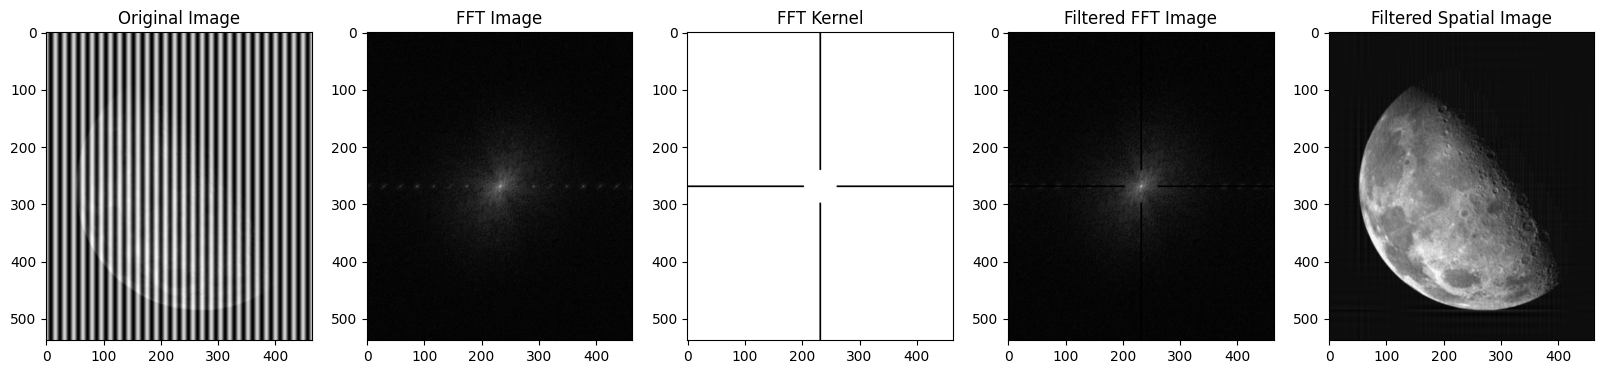

In [34]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))